In [1]:
%cd ..

d:\github\ripple_heterogeneity\python


In [2]:
import pandas as pd
import numpy as np 
import glob
import matplotlib.pyplot as plt

# import hdf5storage
# import h5py
# import scipy.io as sio

import sys,os

import functions

import nelpy as nel  # main nelpy imports
import nelpy.plotting as npl  # optional plotting import

import math


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


# load cell metrics

In [3]:
filename = 'A:/Data/Kenji/ec013.540_561/ec013.540_561.cell_metrics.cellinfo.mat'

df,data = functions.load_cell_metrics(filename)
display(df.head())
print(data.keys())

UID  ab_ratio  acg_asymptote      acg_c     acg_d  acg_fit_rsquare  \
0    1  0.332710       0.601433  14.408824  2.540505         0.259941   
1    2  0.269982       7.340904   8.113168  4.658616         0.873546   
2    3 -0.310621      -3.664141  17.082819  1.496071         0.886190   
3    4 -0.248032       3.026403   6.292553  2.999373         0.723261   
4    5 -0.278485       4.534593  14.184590  1.612977         0.736797   

       acg_h  acg_refrac  acg_tau_burst  acg_tau_decay  ...   trilat_y  \
0  22.853461    9.984846       4.074157       5.190860  ... -34.363568   
1  23.689211    3.013510       1.608141      19.391276  ... -28.168134   
2  27.043742    5.092623       1.927423     107.494177  ... -34.947582   
3  16.945979    5.593262       1.485837      19.434022  ... -22.719008   
4   7.777361    2.671208       0.954870       4.112831  ... -34.185602   

  troughToPeak troughtoPeakDerivative       basename  \
0         0.23                   0.15  ec013.540_561   
1         0.27                   0.17  ec013.540_561   
2         0.46                   0.19  ec013.540_561   
3         0.44                   0.20  ec013.540_561   
4         0.49                   0.19  ec013.540_561   

                      basepath   sex  species      strain  geneticLine  \
0  A:\Data\Kenji\ec013.540_561  Male      Rat  Long Evans    Wild type   
1  A:\Data\Kenji\ec013.540_561  Male      Rat  Long Evans    Wild type   
2  A:\Data\Kenji\ec013.540_561  Male      Rat  Long Evans    Wild type   
3  A:\Data\Kenji\ec013.540_561  Male      Rat  Long Evans    Wild type   
4  A:\Data\Kenji\ec013.540_561  Male      Rat  Long Evans    Wild type   

   cellCount  
0         88  
1         88  
2         88  
3         88  
4         88  

[5 rows x 60 columns]

dict_keys(['acg_wide', 'acg_narrow', 'acg_log10', 'ripple_fr', 'chanCoords_x', 'chanCoords_y', 'epochs', 'spikes', 'waveforms'])


# load xml and position

In [29]:
nChannels, fs, fs_dat, shank_to_channel = functions.loadXML(df.basepath[0])
position,fs_pos = functions.load_position(df.basepath[0]) 

# put into nelpy objects

In [9]:
epochs = nel.EpochArray([np.array([data['epochs'].startTime,data['epochs'].stopTime]).T])
for ep,name in zip(epochs,data['epochs'].name):
    print(name,ep.duration)
st = nel.SpikeTrainArray(timestamps=np.array(data['spikes'],dtype="object"), support=epochs, fs=fs_dat)
pos = nel.AnalogSignalArray(data=[position.x1, position.y1],support=epochs, fs=fs_pos)
print(st)
print(pos)



ec013.540_sleep 59:50:554 minutes
ec013.541_Mwheel 2:17:300 minutes
ec013.542_Mwheel 25:25:350 minutes
ec013.543_Mwheel 1:59:603 minutes
ec013.544_Mwheel 29.1 seconds
ec013.545_Mwheel 12:04:100 minutes
ec013.546_sleep 19:07:699 minutes
ec013.547_sleep 59:16:100 minutes
ec013.548_sleep 18:07:300 minutes
ec013.549_sleep 33:16:800 minutes
ec013.550_sleep 7:16:224 minutes
ec013.551_sleep 12:57:830 minutes
ec013.552_bigSquare 19:56:032 minutes
ec013.553_bigSquare 41:44:294 minutes
ec013.554_linear 17:12:602 minutes
ec013.555_linear 18:12:403 minutes
ec013.556_linear 12:58:649 minutes
ec013.557_sleep 5:26:041 minutes
ec013.558_sleep 2:18:444 minutes
ec013.559_sleep 46:54:362 minutes
ec013.560_sleep 9:14:598 minutes
ec013.561_sleep 13:55:800 minutes
<SpikeTrainArray at 0x19a2f5e3160: 88 units (22 segments)> at 20000 Hz
<AnalogSignalArray at 0x19a2f5e3130: 2 signals (22 segments)> for a total of 7:20:01:188 hours


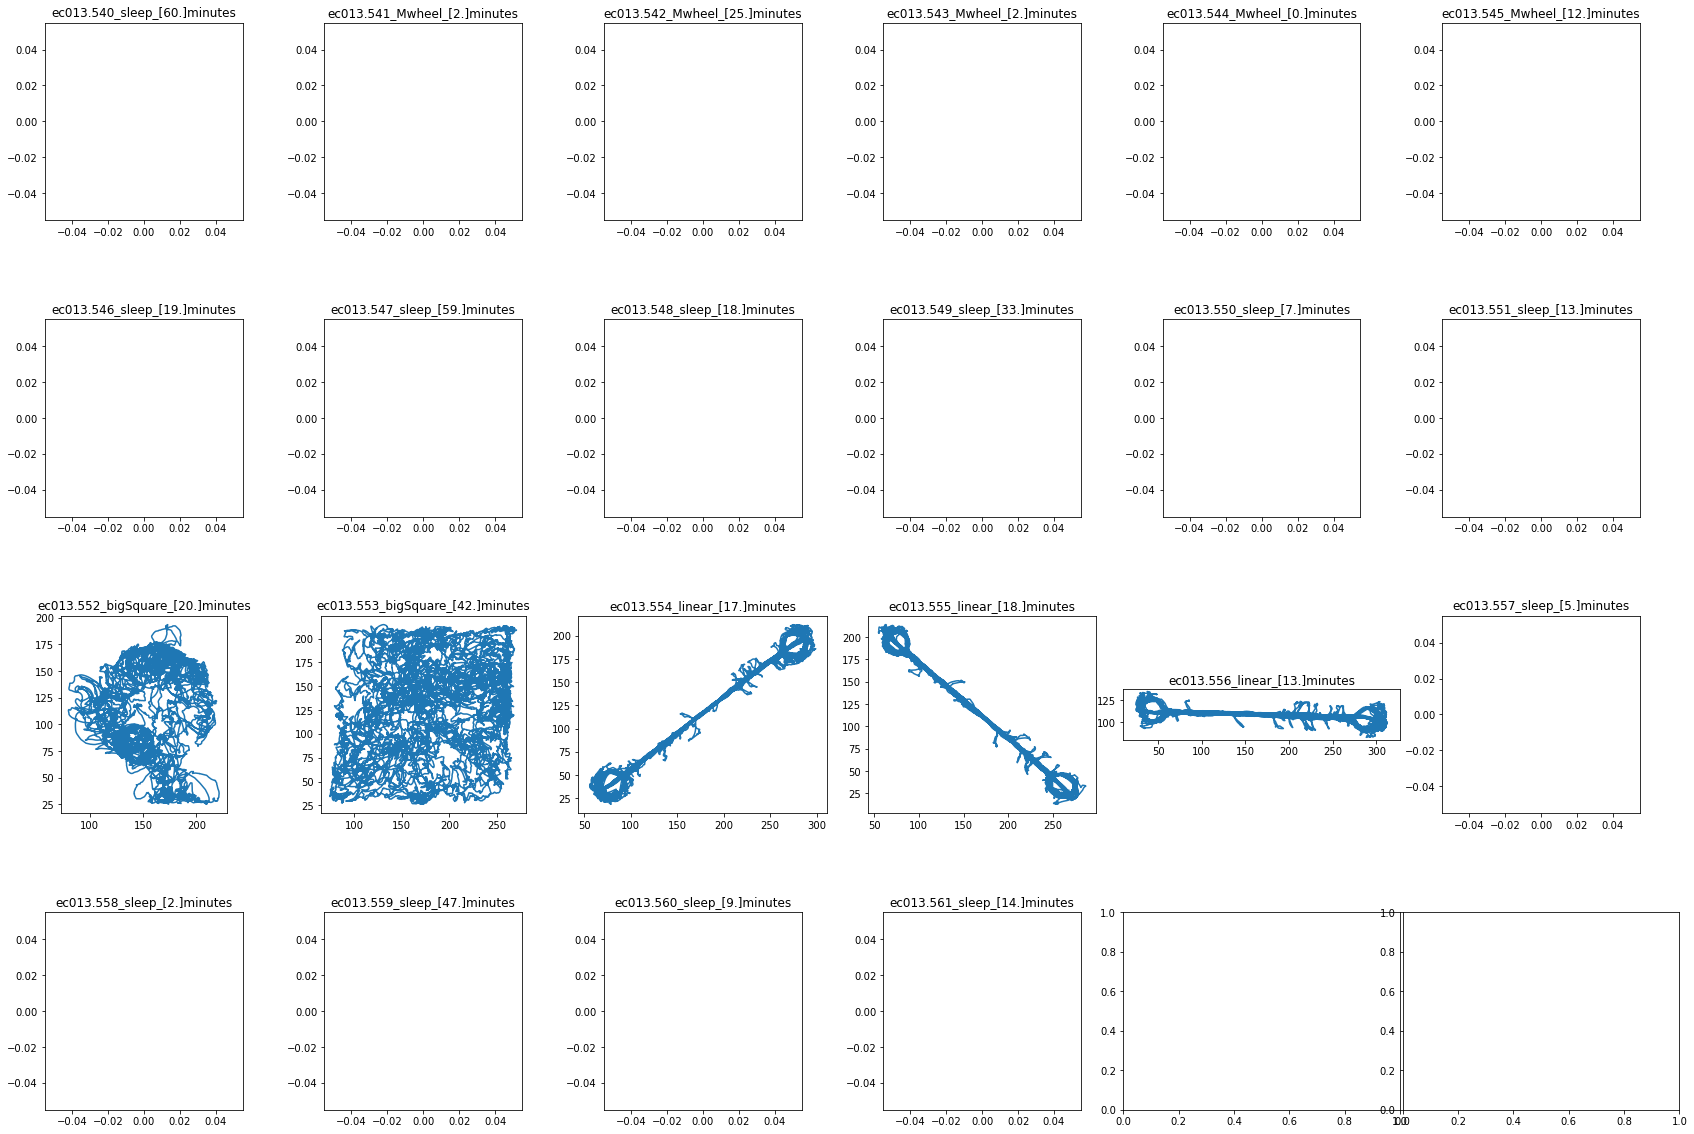

In [10]:
import warnings
warnings.filterwarnings("ignore")

n_columns = 6
n_rows = math.ceil(len(pos)/n_columns) 

fig, axs = plt.subplots(n_rows,n_columns, figsize=(30, 20), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=0.01)
axs = axs.ravel()

for i,p in enumerate(pos):
    axs[i].plot(p.data[0],p.data[1])
    axs[i].set_title(data['epochs'].name[i] + '_' + str(np.round(p.lengths/fs_pos/60))+ 'minutes')
    axs[i].set_aspect('equal')

# make linear track linear

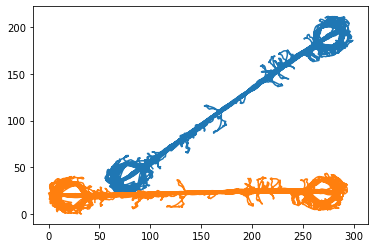

In [67]:
x,y = functions.linearize_position(pos[14].data[0,:],pos[14].data[1,:])

plt.plot(pos[14].data[0,:],pos[14].data[1,:])
plt.plot(x,y)

In [68]:
pos1d = nel.AnalogSignalArray(x, timestamps=pos[14].time, support=pos[14].support, fs=fs_pos)
pos1d

<AnalogSignalArray at 0x19a279b14c0: 1 signals> for a total of 17:12:602 minutes

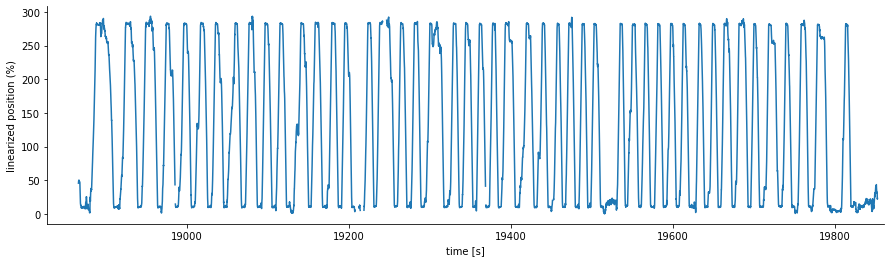

In [69]:
ig = plt.figure(figsize=(15,4))
npl.plot(pos1d)
ax = plt.gca()
ax.set_xlabel('time [s]')
ax.set_ylabel('linearized position (%)')
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)